In [1]:
import pandas as pd
import networkx as nx

#### Locate Isolates

The smallest distinct element of any network is an isolate: a node that is not
connected to any other node (an isolate can still be connected to itself with a
loop edge). Though isolates belong to a bigger network, their very existence is
against the networking spirit, because the whole idea of networking is that of
connectedness.

An example of an isolate in a semantic network is a word that
has no synonyms, no homonyms, no antonyms, and no other relationships to any
other word (say, “sphygmomanometer” in a network of simple synonyms—
because it has none). An example of an isolate in a product network is an item
that nobody ever buys together with any other item. The last meal comes to
mind, but then, again, nobody pays for the last meal, so technically it is not even
a purchase.

In [6]:
G = nx.Graph()
G.add_nodes_from("ABCD") # No edges -- all nodes are isolates|

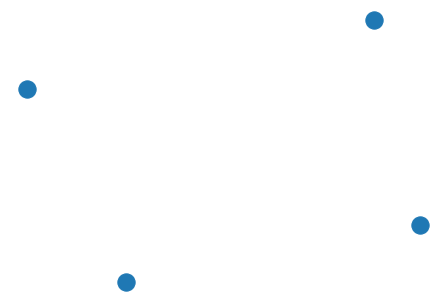

In [7]:
nx.draw(G)

In [8]:
my_isolates = list(nx.isolates(G))
print(my_isolates)
G.remove_nodes_from(my_isolates) # No more isolates!

['A', 'B', 'C', 'D']


In [10]:
G.nodes

NodeView(())

#### Split Networks into Connected Components

A connected component is a subset of network nodes such that there exists a
path (Think in Terms of Paths) from each node in the subset to any other node in
the same subset. An isolate is a special case of a connected component: there is
only one node in the subset, so no path is even needed! The figure shows a
network with three connected components: a larger component A, smaller
component B, and isolate C. A fictitious network traveler can get from any node
in A to any node in A, but not to any node in B.

If a network is directed, it may have weakly and strongly connected components.
In a strongly connected component, there is always a directed path from any
node of the component to any other node of the same component. In a weakly
connected component, you are allowed to travel one-way streets in the wrong
direction (drive responsibly!), if this is what it takes to get from the source to the
destination. Both components A and B in the figure are weakly connected, but B
is also strongly connected. (No nodes are reachable from a2!) NetworkX provides
two families of functions for component analysis.

In [11]:
F = nx.DiGraph()
F.add_node("C")
F.add_edges_from([("B", "b0"), ("b0", "b1"), ("b1", "B")])
F.add_edges_from([("A", "a0"), ("a0", "a1"), ("a1", "a2"), ("a1", "a3"),("a3", "A")])

In [12]:
list(nx.weakly_connected_components(F))

[{'C'}, {'B', 'b0', 'b1'}, {'A', 'a0', 'a1', 'a2', 'a3'}]

In [14]:
list(nx.strongly_connected_components(F))

[{'C'}, {'B', 'b0', 'b1'}, {'a2'}, {'A', 'a0', 'a1', 'a3'}]

Note how we convert the directed graph F into an undirected graph G in the last
expression. The connected components of the converted graphs are the same as
the weakly connected components of the original graph.

In [15]:
G = nx.Graph(F)
list(nx.connected_components(G))

[{'C'}, {'B', 'b0', 'b1'}, {'A', 'a0', 'a1', 'a2', 'a3'}]

You can use the
obtained node sets to extract the respective subgraphs from the original graph:

In [16]:
wcc = nx.subgraph(F, list(nx.weakly_connected_components(F))[1])
len(wcc)

3

One of the components in a complex network often dominates the others: not so
much because it is strong, but because it is giant. The giant connected
component (GCC) is simply the largest component by the node count. NetworkX
does not provide a function for extracting the GCC, but you can still find it by
calling one of the functions mentioned previously, reverse sorting the generated
list by size, and taking the first element:

In [17]:
comp_gen = nx.connected_components(G)
gcc = sorted(comp_gen, key=len, reverse=True)[0]

#### Separate Cores, Shells, Coronas, and Crusts

The only valuable property of a connected component is its connectedness.
There is always a way to get from any node A in a component to any other node
B in the same component. The property of connectedness is global and, while
important for social and communication networks (where paths are responsible
for information diffusion), may not be adequate for semantic, product, and other
types of networks, where direct or short-haul connections are more essential.
Consider a network of synonyms: “emerald” is a synonym of “green,” and
“green” is a synonym of “ecological,” but “ecological” is hardly a synonym of
“emerald.”

One of the fundamental tools in modern sociology is core-peripheral analysis. A
social network, thereby, consists of two sets of nodes: the core (the nodes that
are more or less tightly interconnected) and the periphery (the nodes that are
tightly connected to the core, but only weakly, if at all, connected to the other
peripheral nodes). The graphs of core-peripheral networks often have a “hairy”
appearance: their dense “body” is adorned with “pendulums,” multi-edge selfloops,
and so on.

A core or, more accurately, a k-core (where k could be any non-negative integer
number) is a subgraph of the original network graph such that each node in the
subgraph has at least k neighbors. A 0-core is, naturally, the whole graph. A 1-
core is a graph with no isolates. A 2-core is a graph where no node has fewer
than two neighbors (no node is a part of a pendulum). Any graph usually has
more than one core; the core with the largest possible k is called the main core. A
k-core construction process is iterative:

1. Start with the original graph and remove all nodes that have a degree
smaller than k and all the incident edges; this will probably result in some
of the remaining nodes losing their neighbors and their degree decreasing.
2. Some nodes that have k neighbors or more may have fewer than k neighbors
after trimming; remove them, too, and iterate until no remaining node has
fewer than k neighbors.
3. The remaining nodes form the k-core.

A k-crust is what is left of the original network when we remove the k-core. In
other words, the crust is the periphery.

A core has its internal structure. The subgraph of the k-core in which all nodes
have exactly k neighbors in the core is called a k-corona. Unlike crusts, coronas
are not necessarily connected and may consist of unconnected components—that
is, unconnected within the corona.
Finally, a subset of nodes in k-core but not in (k+1)-core, is called a k-shell. Just
like a corona, a shell may consist of components that are not connected within
the shell. Let’s experiment with the graph from the following figure.

In [19]:
G = nx.Graph(
(("Alpha", "Bravo"), ("Bravo", "Charlie"), ("Charlie", "Delta"),
("Charlie", "Echo"), ("Charlie", "Foxtrot"), ("Delta", "Echo"),
("Delta", "Foxtrot"), ("Echo", "Foxtrot"), ("Echo", "Golf"),
("Echo", "Hotel"), ("Foxtrot", "Golf"), ("Foxtrot", "Hotel"),
("Delta", "Hotel"), ("Golf", "Hotel"), ("Delta", "India"),
("Charlie", "India"), ("India", "Juliet"), ("Golf", "Kilo"),
("Alpha", "Kilo"), ("Bravo", "Lima")))

In [20]:
nx.k_core(G).nodes() # Round and square nodes and shaded edges

NodeView(('Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel'))

In [21]:
nx.k_crust(G).nodes() # Triangular nodes and shaded edges

NodeView(('Alpha', 'Bravo', 'India', 'Juliet', 'Kilo', 'Lima'))

In [22]:
nx.k_shell(G).nodes() # Round and square nodes and shaded edges

NodeView(('Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel'))

In [23]:
nx.k_corona(G, k=3).nodes() # Square nodes

NodeView(('Golf', 'Charlie'))

#### Extract Cliques

Unlike the smaller components, the GCC and the k-cores are usually too large to
be considered a single structural element. Depending on your interpretation of
the nodes and edges, you should zoom in even further in a search for smaller
network building blocks, such as cliques.

A clique, or, more accurately, a k-clique is a subset of k nodes such that each
node is directly connected to each other node in the clique. (We distinguish weak
and strong cliques in directed graphs.) Cliques are also known as complete
subgraphs. The nodes in a clique may be connected to other nodes as well, but
they do not have to—that is, the degree of a node in a k-clique is at least k-1. The
principal difference between cliques and connected components is that the path
between any two nodes in a clique must have the length of 1, while in a
component, the path length is limited only by the graph diameter (Think in
Terms of Paths).

Any single node is a 1-clique, a monad. Any two connected nodes form a 2-
clique, a dyad. A triangle of nodes—the result of transitive closure—is a 3-
clique, a triad (Explore Neighborhoods). Monads, dyads, and triads are very
common in complex networks.

A maximal clique is a k-clique that cannot be made a (k+1)-clique by adding
another node to it. For example, clique (Alpha, Bravo, ..., Echo) in the following
figure is a maximal clique, because including any other node (Foxtrot, Golf, or
Hotel) into it invalidates the complete connectedness property. For example, if
Foxtrot is included, then (Alpha, Bravo, ..., Foxtrot) is not a clique anymore. The
largest maximal clique in a network graph is called the maximum clique.

In [24]:
# Generate a 5-clique
G = nx.complete_graph(5, nx.Graph())
nx.relabel_nodes(G,
dict(enumerate(("Alpha", "Bravo", "Charlie", "Delta", "Echo"))),
copy=False)
# Attach a pigtail to it
G.add_edges_from([
("Echo", "Foxtrot"), ("Foxtrot", "Golf"), ("Foxtrot", "Hotel"),
("Golf", "Hotel")])

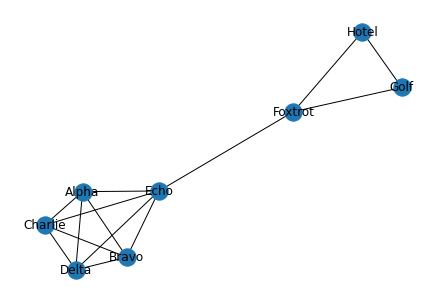

In [26]:
nx.draw(G,with_labels = True)

NetworkX provides function nx.find_cliques for finding all maximal cliques in a
graph (the largest of which is the maximum clique).

In [27]:
list(nx.find_cliques(G))

[['Golf', 'Foxtrot', 'Hotel'],
 ['Echo', 'Charlie', 'Alpha', 'Delta', 'Bravo'],
 ['Echo', 'Foxtrot']]

You have at least two good reasons to search a network for k-cliques: a
theoretical and an empirical one. In the theoretical case, you may already have
some prior knowledge about the network structure.

For example, a marketing
specialist may define a project basket in a product network as a collection of
products such that they are always purchased together (and, therefore, form a
clique when represented as a network). Recognizing k-cliques in a product
network almost instantly leads you to the discovery of project baskets. Closely
cooperating teams in social and organizational networks are k-cliques, and such
are collections of complete synonyms in semantics networks.

In the empirical case, you use cliques as opaque network atoms. If you assume
that an edge between two nodes is an indication of their significant similarity,
then a complete connectedness within a clique implies overall significant
similarity of the member nodes. Thus, you can replace all k nodes with one node
that represents the entire clique, or with a newly minted “clique-node,”
potentially significantly simplifying the network topology. Function
nx.make_max_clique_graph generates a new graph by replacing each maximal
clique with a new synthetic node:

In [28]:
synthetic = nx.make_max_clique_graph(G)
synthetic.edges()

EdgeView([(0, 2), (1, 2)])

#### Recognize Clique Communities
By definition, a clique is a very rigid and sensitive network structure. Removing
an edge from a k-clique transforms it into two interwound, partially overlapping,
adjacent (k-1)-cliques.

In the figure, subgraphs Alpha--Delta and Alpha--Charlie,
Echo are 4-cliques each, but the whole network is not a 5-clique, because the
edge Delta--Echo is missing

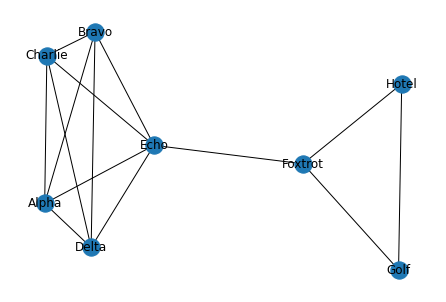

In [30]:
nx.draw(G,with_labels=True)

NetworkX supports k-clique communities. A k-clique community is a
union of all k-cliques that can be reached through adjacent k-cliques.
The
process of reaching all cliques in the union is called clique

if the relationship represented by the edges is only approximately
transient (if A is adjacent to B, and B is adjacent to C, then A is not necessarily
adjacent to C—as it would be in the case of personal friendship), then two nodes
separated by a multi-edge path may actually have little or nothing shared, and
their membership in the same clique community would be questionable.

Only you can determine whether clique communities are appropriate for your
network. But once you do, here’s the function for doing the dirty job:

In [33]:
from networkx.algorithms.community import k_clique_communities

In [34]:
list(k_clique_communities(G, k=3))

[frozenset({'Foxtrot', 'Golf', 'Hotel'}),
 frozenset({'Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo'})]

#### Outline Modularity-Based Communities

The fuzziest and most flexible form of node organization in
a complex network is network communities based on
modularity. They are sometimes also called clusters or
groups, and are not to be confused with clique communities